#**SVM**
Given 4 toy datasets for binary classification in 2D, we built the best SVM classifier for each dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

In [2]:
def make_meshgrid(x, y, mrg, h=.02):
    x_min, x_max = x.min() - mrg, x.max() + mrg
    y_min, y_max = y.min() - mrg, y.max() + mrg
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [4]:
def linearly_sep():
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                               random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    return X, y

In [5]:
def svm_data():
    data = loadmat("svm_2d_data.mat");
    X = data['X']
    y = data['y']
    y = np.reshape(y, (144,))
    return X, y

In [6]:
def run_classifier(X_all, y_all, ax, krnl, C_val=1, mrg=1, gamma=1):
    X, X_test, y, y_test = \
        train_test_split(X_all, y_all, test_size=0.4, random_state=42)

    if krnl == 'poly':
        print('poly')
        model = SVC(kernel='poly', degree=2, C=C_val)
    else:
        if krnl == 'rbf':
            print('rbf')
            model = SVC(kernel=krnl, gamma=gamma, C=C_val)
        else:
            print('linear')
            model = SVC(kernel=krnl, C=C_val)

    clf = model.fit(X, y)

    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, mrg)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    # plot decision boundary and margins
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    P = model.decision_function(xy).reshape(xx.shape)
    ax.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
               facecolors='none', zorder=10, edgecolors='k')

    # test points
    Xt0, Xt1 = X_test[:, 0], X_test[:, 1]
    ax.scatter(Xt0, Xt1, c=y_test, cmap=plt.cm.coolwarm, s=40, alpha=0.5, edgecolors='k')

    #print test accuracy
    print(clf.score(X_test, y_test))

In [7]:
linearly_separable = linearly_sep()
new_data = svm_data()
datasets = [linearly_separable,
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            new_data]

In [8]:
h = .02  # step size in the mesh
i = 1

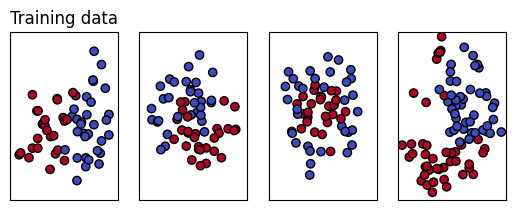

In [9]:
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset
    cm = plt.cm.RdBu
    ax = plt.subplot(2, len(datasets), i)
    if ds_cnt == 0:
        ax.set_title("Training data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm,
               edgecolors='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    #    plt.axis('equal')
    i += 1

Classifier for the data in the first column:

linear
0.95


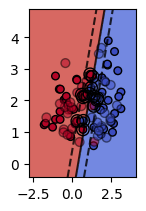

In [10]:
X, y = datasets[0]
ax = plt.subplot(2, len(datasets), i)
run_classifier(X, y, ax, krnl='linear', C_val=0.8, mrg=1, gamma=0.81)
i += 1

Classifier for the data in the second column:

rbf
0.975


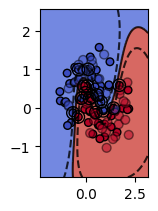

In [11]:
X, y = datasets[1]
ax = plt.subplot(2, len(datasets), i)
run_classifier(X, y, ax, krnl='rbf', C_val=30, mrg=1, gamma=0.5)
i += 1

Classifier for the data in the third column:

rbf
0.95


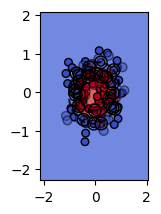

In [12]:
X, y = datasets[2]
ax = plt.subplot(2, len(datasets), i)
run_classifier(X, y, ax, krnl='rbf', C_val=40, mrg=1, gamma=0.2)

Classifier for the data in the last column:

poly
0.9655172413793104


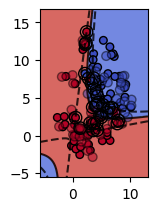

In [13]:
X, y = datasets[3]
ax = plt.subplot(2, len(datasets), i)
run_classifier(X, y, ax, krnl='poly', C_val=0.4, mrg=3, gamma=0.5)

In [14]:
plt.show()